<a href="https://colab.research.google.com/github/kfoldcrossvalidator/BenignOverfitting-JAX/blob/main/BenignOverfittingJAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an implementation of the paper "Benign Overfitting in Linear Regression" in the JAX neural network library. 

In [21]:
import jax.numpy as jnp
import jax
from jax import jit
import numpy as np
from functools import partial

from scipy.stats import ortho_group

@jax.partial(jit, static_argnums=[1,2])
def get_risk(cov, d, n, theta_ast, key):
    #note: covariance is a vector, because the covariance matrix is diagonlizable and only its spectrum matters for the purpose of our calculation.
    subkey1, subkey2 = jax.random.split(key)
    X = jnp.sqrt(cov) * jax.random.normal(subkey1, [n, d])
    y_mean = X @ theta_ast
    y = y_mean + jax.random.normal(subkey2, [n])
    theta_hat = X.T @ jnp.linalg.inv(X @ X.T) @ y
    test_loss = (theta_ast - theta_hat).T @ jnp.diag(cov) @ (theta_ast - theta_hat)
    return test_loss


In [23]:
get_risk(jnp.array([1, 1, 1, 1]), 4, 2, jnp.array([1, 1, 1, 1]), jax.random.PRNGKey(10))

DeviceArray(1.4771416, dtype=float32)

In [3]:
cov1_data = []
cov2_data = []
cov3_data = []

for l in jnp.geomspace(30, 4000, 20):
    d = 5 * int(l)
    key = jax.random.PRNGKey(2*d)
    key, subkey = jax.random.split(key)

    n = 6
    theta_ast = jax.random.normal(subkey, [d]) / jnp.sqrt(d)
    cov1 = (jnp.arange(1,d+1).astype(jnp.float32) ** -0)
    cov2 = (jnp.arange(1,d+1).astype(jnp.float32) ** -1 * jnp.log(jnp.arange(2,d+2).astype(jnp.float32)) ** -2)
    cov3 = (jnp.arange(1,d+1).astype(jnp.float32) ** -2)
    
    
    cov1_data.append((l, get_risk(cov1, d, n, theta_ast, key)))
    cov2_data.append((l, get_risk(cov2, d, n, theta_ast, key)))
    cov3_data.append((l, get_risk(cov3, d, n, theta_ast, key)))

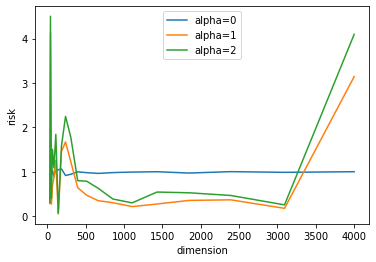

In [5]:
import matplotlib.pyplot as plt

def plot_points(data, label):
    x, y = zip(*data)
    plt.plot(x, y, label=label)
    plt.xlabel("dimension")
    plt.ylabel("risk")
    
plot_points(cov1_data, "alpha=0")
plot_points(cov2_data, "alpha=1")
plot_points(cov3_data, "alpha=2")
plt.legend()